In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pickle
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
import tensorflow as tf
import pandas as pd
import numpy as np

2024-10-30 01:22:54.605018: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-30 01:22:54.613347: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-30 01:22:54.622188: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-30 01:22:54.624901: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-30 01:22:54.632022: I tensorflow/core/platform/cpu_feature_guar

In [2]:
df = pd.read_pickle("merged_df.pkl")

<Axes: >

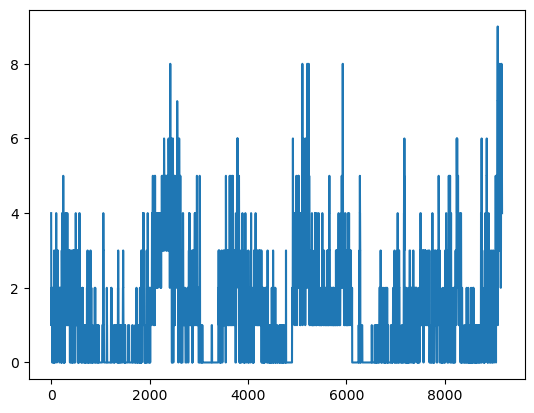

In [3]:
df.dropna(inplace=True)
df['count'] = df['detected'].apply(lambda x: sum(eval(x).values()))
df = df[['doppz', 'azimuthz', 'count','session']]
df['count'].plot()

In [4]:
Y = df['count'].values
Y[df['count'].values>=1]=1

In [ ]:
base_output_dir = 'spectrum_images'
doppler_output_dir = os.path.join(base_output_dir, 'doppler')
azimuth_output_dir = os.path.join(base_output_dir, 'range_azimuth')

for label in [0, 1]:
    os.makedirs(os.path.join(doppler_output_dir, str(label)), exist_ok=True)
    os.makedirs(os.path.join(azimuth_output_dir, str(label)), exist_ok=True)

def load_pickle_data(filepath):
    with open(filepath, 'rb') as f:
        data = pickle.load(f)
    return data

def generate_range_image(data, data_type, label, idx, output_dir):
   
    data = np.array(data, dtype=float)
    
    if data.ndim != 2:
        print(f"Warning: Expected 2D data for plotting, but got shape {data.shape} for {data_type}_{idx}")
        return None
    
    plt.figure(figsize=(2, 2))
    plt.axis('off')
    plt.imshow(data, aspect='auto', cmap='viridis')
    
    filename = os.path.join(output_dir, str(label), f"{data_type}_{idx}.png")
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()
    return filename

data=df

doppz_signals = data['doppz']
azimuthz_signals = data['azimuthz']
labels = data['count']  

doppz_paths = []
azimuthz_paths = []
for i, (doppz, azimuthz, label) in enumerate(zip(doppz_signals, azimuthz_signals, labels)):
    doppz_path = generate_range_image(doppz, 'doppz', label, i, doppler_output_dir)
    azimuthz_path = generate_range_image(azimuthz, 'azimuthz', label, i, azimuth_output_dir)
    
    if doppz_path and azimuthz_path:
        doppz_paths.append(doppz_path)
        azimuthz_paths.append(azimuthz_path)

assert len(doppz_paths) == len(azimuthz_paths) == len(labels), "Mismatch between image paths and labels."